<a href="https://colab.research.google.com/github/Sonishma/2434750_SonishmaBasnet/blob/main/2434750_SonishmaBasnet_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Custom Linear Regression Performance:
MAE: 718418.7011127275
MSE: 74822402555654.62
R2 Score: 0.03362055412657694

Best Ridge Regression Performance:
R2 Score: 0.03439716116350766

Best Lasso Regression Performance:
R2 Score: 0.03296835868499037


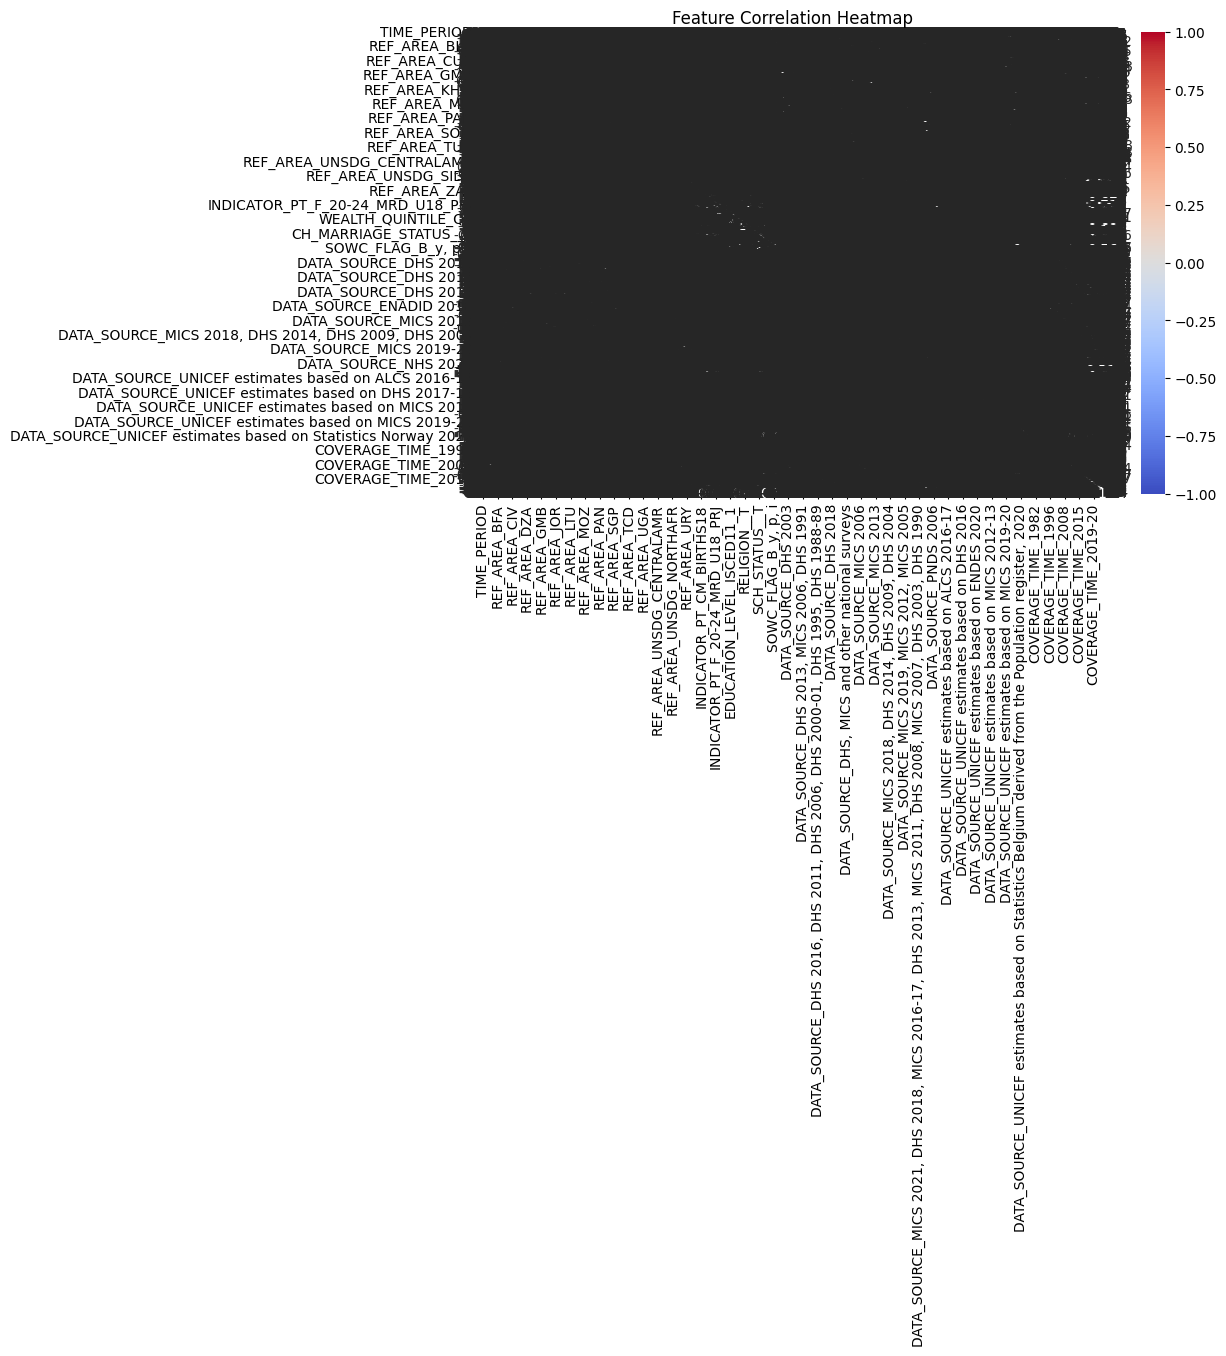

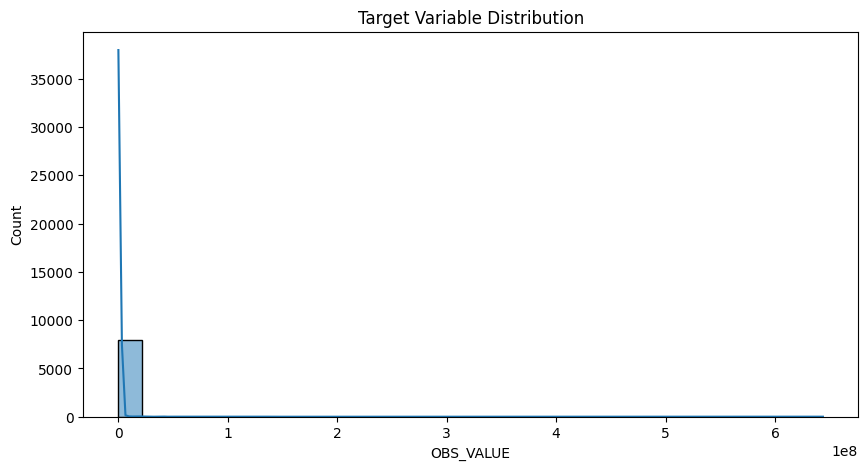


Regression Tasks Successfully Completed!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# Load dataset
file_path = "/content/drive/MyDrive/SonishmaBasnet_2434750/PT_CM_12122023_b4a77327a1.csv"
df = pd.read_csv(file_path)

# Drop irrelevant columns
drop_cols = ['DATAFLOW', 'M49', 'SOURCE_LINK', 'SERIES_FOOTNOTE', 'OBS_FOOTNOTE']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols)

# Define features and target variables
X = df.drop(columns=['OBS_VALUE'])
y = df['OBS_VALUE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Implementing Linear Regression from scratch
class CustomLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.theta = np.zeros(X.shape[1])
        m = len(y)

        for _ in range(self.epochs):
            gradients = (1/m) * X.T.dot(X.dot(self.theta) - y)
            self.theta -= self.learning_rate * gradients

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(self.theta)

# Train custom Linear Regression model
custom_lr = CustomLinearRegression()
custom_lr.fit(X_train_selected, y_train)
y_pred_custom = custom_lr.predict(X_test_selected)

# Train standard models with Hyperparameter Tuning
ridge_params = {'alpha': [0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_selected, y_train)
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train_selected, y_train)

best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

y_pred_ridge = best_ridge.predict(X_test_selected)
y_pred_lasso = best_lasso.predict(X_test_selected)

# Evaluate models
print("\nCustom Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_custom))
print("MSE:", mean_squared_error(y_test, y_pred_custom))
print("R2 Score:", r2_score(y_test, y_pred_custom))

print("\nBest Ridge Regression Performance:")
print("R2 Score:", r2_score(y_test, y_pred_ridge))

print("\nBest Lasso Regression Performance:")
print("R2 Score:", r2_score(y_test, y_pred_lasso))

# EDA Visualizations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['OBS_VALUE'], bins=30, kde=True)
plt.title('Target Variable Distribution')
plt.show()

print("\nRegression Tasks Successfully Completed!")
